# Week5 Multiple Linear Regression
## 背景描述  
记录了一个班级 22 名学生, 在统计课上的两次预试成绩 (P1,P2) 和最后的期末成绩 F。  
由此我们构造了 22 个观测的 3 个变量，具体请见下表：

## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）$P_1$ | 第一次预试成绩 | continuous variable | $\mathbb{R}^+$ |
| （自变量）$P_2$ | 第二次预试成绩 | continuous variable | $\mathbb{R}^+$ |
| （因变量）$F$ | 期末成绩 | continuous variable | $\mathbb{R}^+$ |

## 问题
这里使用 $\alpha=0.05$ 的水平
1. 请用统计模型描述前两次预试成绩和最后的期末成绩之间的关系.
2. 请问Q1中所建立的模型是否合理. 
3. 张三同学（不在这 22 学生中）的前两次预试成绩分别为 88 分和 92 分，请给出一个合理的区间，来预测他的期末成绩能考多少分.

## 解决方案

**Q1:**  
列出线性模型为：$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \epsilon$

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t

alpha = 0.05
p = 2
n = 88
# 把1这一项插入原始数据里面
x = pd.read_csv('Examination_Data.csv')
x.insert(0, 'intercept', np.ones(len(x))) 
data = x.values * 1
df = pd.DataFrame(data, columns = ['intercept', 'P1', 'P2', 'F'])
print(df.head(10))





   intercept    P1    P2     F
0        1.0  78.0  73.0  68.0
1        1.0  74.0  76.0  75.0
2        1.0  82.0  79.0  85.0
3        1.0  90.0  96.0  94.0
4        1.0  87.0  90.0  86.0
5        1.0  90.0  92.0  90.0
6        1.0  83.0  95.0  86.0
7        1.0  72.0  69.0  68.0
8        1.0  68.0  67.0  55.0
9        1.0  69.0  70.0  69.0


In [2]:
# 可以用一些方法提取这些表里面的统计量

In [3]:
# Do the multiple linear regression
model = ols('F ~ P1 + P2', df).fit()
beta = model.params
print('参数估计值: \n', round(beta, 4))
X = data[:, 0 : p + 1]
Y = data[:, -1]
Y_hat = model.fittedvalues
model.summary()

参数估计值: 
 Intercept   -14.5005
P1            0.4883
P2            0.6720
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      F   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     331.4
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           7.36e-41
Time:                        11:05:08   Log-Likelihood:                -239.36
No. Observations:                  88   AIC:                             484.7
Df Residuals:                      85   BIC:                             492.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.5005      4.367     -3.321      0.001     -23.182      -5.819
P1             0.4883      0.110      4.433      0.000       0.269       0.707
P2             0.6720      0.085      7.928      0.000       0.504       0.841
==============================================================================
Omnibus:                        2.819   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.810
Skew:                          -0.410   Prob(JB):                        0.245
Kurtosis:                       2.696   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
# 输出一元线性回归方程
print('Y_hat = %.2f + (%.2f * X1) + (%.2f * X2)' % (beta[0], beta[1], beta[2]))

Y_hat = -14.50 + (0.49 * X1) + (0.67 * X2)


**将数据中心化之后，求经验回归方程：**

In [5]:
# 求均值
X_mean = []
for k in range(p + 1):
    X_mean.append(np.mean(data[:, k]))  # 自变量 x 的均值
Y_mean = np.mean(data[:, -1])  # 因变量 y 的均值

# 数据中心化
X_cent = X - X_mean
Y_cent = Y - Y_mean

# Do the multiple linear regression
df = pd.DataFrame(X_cent, columns = ['intercept_cent', 'P1_cent', 'P2_cent'])
df['F_cent'] = Y_cent
model_cent = ols('F_cent ~ P1_cent + P2_cent', df).fit()
beta_cent = model_cent.params
print('参数估计值: \n', round(beta_cent, 4))
Y_hat_cent = model_cent.fittedvalues
model_cent.summary()

参数估计值: 
 Intercept    0.0000
P1_cent      0.4883
P2_cent      0.6720
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 F_cent   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     331.4
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           7.36e-41
Time:                        11:05:08   Log-Likelihood:                -239.36
No. Observations:                  88   AIC:                             484.7
Df Residuals:                      85   BIC:                             492.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.331e-15      0.398   8.36e-15      1.000      -0.792       0.792
P1_cent        0.4883      0.110      4.433      0.000       0.269       0.707
P2_cent        0.6720      0.085      7.928      0.000       0.504       0.841
==============================================================================
Omnibus:                        2.819   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.810
Skew:                          -0.410   Prob(JB):                        0.245
Kurtosis:                       2.696   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# 输出中心化后的一元线性回归方程
print('Y_hat_cent = %.2f + (%.2f * X1_cent) + (%.2f * X2_cent)' % (beta_cent[0], beta_cent[1], beta_cent[2]))

Y_hat_cent = 0.00 + (0.49 * X1_cent) + (0.67 * X2_cent)


我们可以发现，对数据进行中心化之后回归常数变为 0，而回归系数值未改变。

**Q2:**  

In [7]:
# 求解相关项
SSE = sum((Y - Y_hat) ** 2)
SST = sum((Y - Y_mean) ** 2)
SSR = sum((Y_hat - Y_mean) ** 2)

sigma2 = SSE / (n - p - 1)  # 方差
sigma = np.sqrt(sigma2)  # 标准差

c = np.dot(X.T, X) #C=(x'x)^{-1}
C = np.linalg.inv(c)  # 求逆
# print(C)

**一元线性模型的显著性检验——F 检验:**  
检验假设：$H_0: \beta_1=\beta_2=0$ vs $H_1: \exists \beta_i \neq 0,i=1,2$

In [8]:
# 计算F0
F0 = (SSR / p) / (SSE / (n - p - 1))
# F0 = model.fvalue
print('F0: %.2f' % F0)
F = round(f.ppf(0.95, dfn = p, dfd = n - p - 1), 2)

# 法1：
pVal1 = f.sf(F0, p, n - p - 1)
# pVal1 = model.f_pvalue
print('pVal1: %.2f' % pVal1)
if pVal1 < alpha:
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 

# 法2：
if F0 > F:
    print('Since F0 > F(0.95, 2, 19) = %.2f, reject H0.' % F)
else:
    print('Accept H0.') 

F0: 331.35
pVal1: 0.00

Since p-value < 0.05, reject H0.
Since F0 > F(0.95, 2, 19) = 3.10, reject H0.


由 F 检验结果可知，该回归方程是显著的。

**一元线性模型的显著性检验——t 检验:**  
检验假设：$H_{0j}: \beta_j=0$ vs $H_{1j}: \beta_j \neq 0,j=1,2$

In [9]:
# t检验
t0 = []
for i in range(p + 1):   
    t0.append(beta[i] / (np.sqrt(C[i][i] * sigma2)))  # 求t值
# t0 = model.tvalues
print('t0值为：', np.round(t0, 4))
tVal = t.ppf(1 - alpha / 2, n - p - 1)
print('t的临界值为：%.4f' % tVal)
pVal2 = []
for i in range(p + 1):
    P = t.sf(abs(t0[i]), n - p - 1)
    pVal2.append(P)  # 已知临界值求p值
# pVal2 = model.pvalues / 2
print('P值为：', np.round(pVal2, 4))

print('\n')
# 法1：
for i in range(p):
    if pVal2[i + 1] < alpha:
        print ('Since p%d-value < 0.05, reject H0%d.' % (i + 1, i + 1))
    else:
        print('Accept H0%d.' % (i + 1))
print('\n')   

# 法2：
for i in range(p):
    if abs(t0[i + 1]) > tVal:
        print('Since t0%d > t(0.975, 19) = %.4f, reject H0%d' % (i + 1, tVal, i + 1))
    else:
        print('Accept H0%d.' % (i + 1)) 

t0值为： [-3.3209  4.4331  7.9284]
t的临界值为：1.9883
P值为： [0.0007 0.     0.    ]


Since p1-value < 0.05, reject H01.
Since p2-value < 0.05, reject H02.


Since t01 > t(0.975, 19) = 1.9883, reject H01
Since t02 > t(0.975, 19) = 1.9883, reject H02


由 t 检验结果可知，各回归系数都是显著的。

**复相关系数（可决系数）的检验:**

In [10]:
# R-square 可决系数
R2 = SSR / SST
print('可决系数：%.4f' % R2)

# 调整可决系数 ，解释变量的数量与拟合的好坏
R2c = 1 - (SSE/(n-p-1)) / (SST/(n-1))
print('调整可决系数：%.4f' % R2c)

可决系数：0.8863
调整可决系数：0.8836


由于复相关系数（可决系数）值接近1，可以说明整体上 $X_1,X_2$ 与 $Y$ 呈线性关系。

综上所述，Q1中所建的多元线性回归模型是合理的。

**残差分析0: 计算期末成绩的残差**

In [11]:
# 用残差分析这里
# 计算期末成绩的残差
data_res = data * 1.0  # 乘1.0 不然会损失精度
for i in range(n):
    data_res[:, p + 1] = Y - Y_hat
df = pd.DataFrame(data_res, columns = ['intercept', 'P1', 'P2', 'F_res'])
res = data_res[:, p + 1]
# res = model.resid
print(df.head())

   intercept    P1    P2     F_res
0        1.0  78.0  73.0 -4.648389
1        1.0  74.0  76.0  2.288855
2        1.0  82.0  79.0  6.366048
3        1.0  90.0  96.0  0.034742
4        1.0  87.0  90.0 -2.468031


**残差分析1: 残差的正态概率图**   
使用残差正态概率图可验证残差呈正态分布的假设。残差的正态概率图应该大致为一条直线。

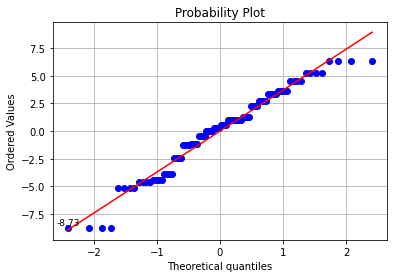

In [12]:
# 残差的正态概率图
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][0]
y = osm[1][0]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
plt.grid()
plt.show()

In [13]:
# 异常值检验
MSE = SSE / (n - p - 1)
# MSE = model.mse_resid
d = np.abs(y) / np.sqrt(MSE)
if d < 3:
    print('残差', round(y, 2), '不是异常值.')
else:
    print('残差', round(y, 2), '是异常值')


残差 -8.73 不是异常值.


**残差分析2: 残差与拟合值的关系图**   
使用残差与拟合值图可验证“残差随机分布”和“具有常量方差”的假设。理想情况下，点应当在 0 的两端随机分布（模型的拟合点应该平均散布在被拟合值点附近），点中无可辨识的模式。  
下表中的模式可能表示该模型不满足模型假设: 

| 模式 | 模式的含义 |
| :----------: | :--------: |
| 残差相对拟合值呈扇形或不均匀分散 | 异方差 |
| 曲线 | 缺少高阶项 |
| 远离 0 的点 | 异常值 |
| 在 X 方向远离其他点的点 | 有影响的点|

Text(0, 0.5, 'e_i')

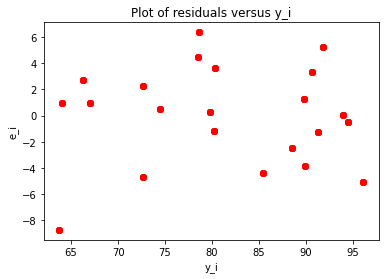

In [14]:
# 残差与拟合值的关系图 ，不应该是残差与观测值之间的关系
plt.scatter(Y_hat, res, c = 'red')
plt.title('Plot of residuals versus y_i')
plt.xlabel('y_i')
plt.ylabel('e_i')

In [15]:
# 上面这个图形符合什么曲线？
# 分布是散乱且没有规则就认为因变量的方差 方差齐性
# 提出方差齐性的假设，看出杂乱无章，是我们不能推翻方差齐性的假设。

【补充】方差分析可以看成特殊情况下的回归分析，方差分析就是解释变量全为分组的dummy（哑变量）的回归分析。  
参考网址：https://zhuanlan.zhihu.com/p/129043279  
方差齐性检验的本质：样本以及总体的方差分布是常数，和自变量或因变量没关系。    
线性回归里面我们一般用残差图来检验方差齐性，画散点图是为了弄清因变量和残差之间有没有关系。这里并不是说不同指标的方差不同，因为这里的自变量不像ANOVA中是可以人为控制的（分组-取值），这里的自变量是**观察**到的，如果我们没法取到每个 x 值所有对应的 y 值，就不能说对不同的指标方差不同，只是说观测值的方差不同（也只是一种探测）；我们这里只是用残差图去估计因变量的方差齐性（比较主观，看残差分布是否与拟合值没有明显的趋势关系）。  
当然我们并不能通过残差的分布来证明因变量的方差齐性，我们只是提出了“方差齐性”的假设，然后画出残差图，它杂乱无章，不相关，看起来是独立的，所以我们不能推翻这个假设，就认为观测值的方差是齐性的。  
参考网址：https://blog.csdn.net/weixin_33448555/article/details/112650361

**Q3:**

**关于 $E(y_0)$ 的估计:**

In [16]:
# 给定 x_0，求 E(y_0) 的估计值
def confidence_interval(x0):
    x0 = np.array(x0)
    Y0 = np.dot(x0.T, beta)
    delta0 = tVal * sigma * np.sqrt(x0.T @ C @ x0)
    Y0_int = [Y0 - delta0, Y0 + delta0]
    return Y0_int

x0 = [1]
for i in range(p):
    x0.append(int(input()))
print('给定 x = ', x0, ', E(y_0) 的置信区间：', np.round(confidence_interval(x0), 4))

ValueError: invalid literal for int() with base 10: ''

**关于 $y_0$ 的预测:**

In [17]:
# # 给定 x_0，求 y_0 的预测区间
# def confidence_interval(x0):
#     x0 = np.array(x0)
#     Y0 = np.dot(x0.T, beta)
#     delta1 = tVal * sigma * np.sqrt(1 + x0.T @ C @ x0)
#     Y0_int = [Y0 - delta1, Y0 + delta1]
#     return Y0_int

# x0_ = [1]
# for i in range(p):
#     x0_.append(5)
# #给两个初始成绩，再给一个期末成绩的预测。 预测区间要比置信区间宽一些。
# print('给定 x = ', x0_, ', y_0 的预测区间：', np.round(confidence_interval(x0_), 4))

KeyboardInterrupt: Interrupted by user

## 第五周练习题
数据集：Project5.csv(内附文档)  
统计方法：Multiple Linear Regression   
软件：Jupyter Notebook  
作业发到邮箱：51205903029@stu.ecnu.edu.cn  
压缩包名字：学号-姓名  
Deadline：下周一晚上10：00之前交  
注：要有完整的解题过程，不能只有代码